<a href="https://colab.research.google.com/github/Amin1771/DL-notebooks/blob/main/bnb_price_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the dataset

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=780b443fbc021a0a540ef3b4ecfd8ac85d42a263674732ab84cc89249957127c
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


In [ ]:
import numpy as np
# Step 1: Install yfinance library
!pip install yfinance --quiet

# Step 2: Import necessary libraries
import yfinance as yf
import pandas as pd
import pandas_ta as ta

# Step 3: Download historical data for BNB-USD
# Binance Coin (BNB) data is available from its launch year, 2017
# Adjust the start date accordingly, as it did not exist in the market in 2015
start_date = "2017-01-01"
end_date = pd.to_datetime("today").strftime("%Y-%m-%d")

# Fetch the data
bnb_data = yf.download("BNB-USD", start=start_date, end=end_date)

# Step 4: Display the first few rows of the data
bnb_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,
2017-11-09,1.99077,2.17423,1.89394,2.05314,19192200
2017-11-10,1.79684,2.06947,1.64478,2.00773,11155000
2017-11-11,1.67047,1.91775,1.61429,1.78628,8178150
2017-11-12,1.51969,1.67280,1.46256,1.66889,15298700
2017-11-13,1.68662,1.73502,1.51760,1.52601,12238800


In [ ]:
bnb_data

Price,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,
2017-11-09,1.990770,2.174230,1.893940,2.053140,19192200
2017-11-10,1.796840,2.069470,1.644780,2.007730,11155000
2017-11-11,1.670470,1.917750,1.614290,1.786280,8178150
2017-11-12,1.519690,1.672800,1.462560,1.668890,15298700
2017-11-13,1.686620,1.735020,1.517600,1.526010,12238800
...,...,...,...,...,...
2025-01-19,682.203979,713.468933,676.847290,709.424805,2841079952
2025-01-20,681.803345,707.576355,672.189392,682.204895,2865652878


In [ ]:
import pandas as pd

# Assuming bnb_data is already loaded with Yahoo Finance data

# Calculate the short-term and long-term EMAs
short_ema = bnb_data[('Close', 'BNB-USD')].ewm(span=12, adjust=False).mean()
long_ema = bnb_data[('Close', 'BNB-USD')].ewm(span=26, adjust=False).mean()

# Calculate the MACD line
bnb_data[('MACD', '')] = short_ema - long_ema

# Calculate the Signal line
bnb_data[('Signal', '')] = bnb_data[('MACD', '')].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
bnb_data[('MACD_histogram', '')] = bnb_data[('MACD', '')] - bnb_data[('Signal', '')]

# Display the first few rows to verify the calculations
(bnb_data[[('Close', 'BNB-USD'), ('MACD', ''), ('Signal', ''), ('MACD_histogram', '')]].head())

Price,Close,MACD,Signal,MACD_histogram
Ticker,BNB-USD,,,
Date,,,,
2017-11-09,1.99077,0.000000,0.000000,0.000000
2017-11-10,1.79684,-0.015470,-0.003094,-0.012376
2017-11-11,1.67047,-0.037495,-0.009974,-0.027521
2017-11-12,1.51969,-0.066352,-0.021250,-0.045102
2017-11-13,1.68662,-0.074888,-0.031977,-0.042911


## Adding RSI

In [ ]:
import pandas as pd

# Assuming `bnb_data` is your DataFrame
# Ensure it's loaded and has the correct structure first
# For example: bnb_data = pd.read_csv("your_data.csv", parse_dates=True, index_col="Date")

# Let's proceed with the RSI calculation
def calculate_rsi(data, window=14):
    # Step 1: Calculate daily price changes
    delta = data['Close'].diff()

    # Step 2: Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Step 3: Calculate the average gain and loss over the rolling window (14 days)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Step 4: Calculate the relative strength (RS)
    rs = avg_gain / avg_loss

    # Step 5: Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Apply the RSI calculation to the DataFrame
bnb_data['RSI'] = calculate_rsi(bnb_data)

# Display a subset of the DataFrame to verify
(bnb_data.head(15))


Price         Close     High      Low     Open    Volume      MACD    Signal  \
Ticker      BNB-USD  BNB-USD  BNB-USD  BNB-USD   BNB-USD                       
Date                                                                           
2017-11-09  1.99077  2.17423  1.89394  2.05314  19192200  0.000000  0.000000   
2017-11-10  1.79684  2.06947  1.64478  2.00773  11155000 -0.015470 -0.003094   
2017-11-11  1.67047  1.91775  1.61429  1.78628   8178150 -0.037495 -0.009974   
2017-11-12  1.51969  1.67280  1.46256  1.66889  15298700 -0.066352 -0.021250   
2017-11-13  1.68662  1.73502  1.51760  1.52601  12238800 -0.074888 -0.031977   
2017-11-14  1.59258  1.73537  1.56827  1.68928   7829600 -0.088224 -0.043227   
2017-11-15  1.53045  1.62498  1.49550  1.58777   7615500 -0.102624 -0.055106   
2017-11-16  1.57792  1.68222  1.53689  1.55619   8928640 -0.108949 -0.065875   
2017-11-17  1.51036  1.58266  1.49530  1.58005   8508840 -0.118053 -0.076310   
2017-11-18  1.67433  1.67678  1.49823  1

## adding EMAM EMAS EMAF

In [ ]:
import pandas as pd

# Assuming `bnb_data` is your DataFrame

# Function to calculate EMA
def calculate_ema(data, span):
    return data['Close'].ewm(span=span, adjust=False).mean()

# Calculate EMAs and add them to the DataFrame
bnb_data['EMAS'] = calculate_ema(bnb_data, span=12)  # EMA Short
bnb_data['EMAM'] = calculate_ema(bnb_data, span=26)  # EMA Medium
bnb_data['EMAF'] = calculate_ema(bnb_data, span=9)   # EMA Fast

# Display a subset of the DataFrame to verify
(bnb_data.head(15))


Price,Close,High,Low,Open,Volume,MACD,Signal,MACD_histogram,RSI,EMAS,EMAM,EMAF
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,,,,,,,
Date,,,,,,,,,,,,
2017-11-09,1.99077,2.17423,1.89394,2.05314,19192200,0.000000,0.000000,0.000000,NaN,1.990770,1.990770,1.990770
2017-11-10,1.79684,2.06947,1.64478,2.00773,11155000,-0.015470,-0.003094,-0.012376,0.000000,1.960935,1.976405,1.951984
2017-11-11,1.67047,1.91775,1.61429,1.78628,8178150,-0.037495,-0.009974,-0.027521,0.000000,1.916248,1.953743,1.895681
2017-11-12,1.51969,1.67280,1.46256,1.66889,15298700,-0.066352,-0.021250,-0.045102,0.000000,1.855239,1.921591,1.820483
2017-11-13,1.68662,1.73502,1.51760,1.52601,12238800,-0.074888,-0.031977,-0.042911,26.164164,1.829297,1.904186,1.793710
2017-11-14,1.59258,1.73537,1.56827,1.68928,7829600,-0.088224,-0.043227,-0.044997,22.803084,1.792879,1.881104,1.753484
2017-11-15,1.53045,1.62498,1.49550,1.58777,7615500,-0.102624,-0.055106,-0.047517,21.019162,1.752506,1.855129,1.708877
2017-11-16,1.57792,1.68222,1.53689,1.55619,8928640,-0.108949,-0.065875,-0.043074,25.473767,1.725646,1.834595,1.682686


## Adding target

In [ ]:
import pandas as pd

# Assuming `bnb_data` is your DataFrame

# Calculate the target by shifting the 'Close' column by -1
bnb_data['Target'] = bnb_data['Close'].shift(-1)

# Display a subset of the DataFrame to verify
(bnb_data.head(15))


Price         Close     High      Low     Open    Volume      MACD    Signal  \
Ticker      BNB-USD  BNB-USD  BNB-USD  BNB-USD   BNB-USD                       
Date                                                                           
2017-11-09  1.99077  2.17423  1.89394  2.05314  19192200  0.000000  0.000000   
2017-11-10  1.79684  2.06947  1.64478  2.00773  11155000 -0.015470 -0.003094   
2017-11-11  1.67047  1.91775  1.61429  1.78628   8178150 -0.037495 -0.009974   
2017-11-12  1.51969  1.67280  1.46256  1.66889  15298700 -0.066352 -0.021250   
2017-11-13  1.68662  1.73502  1.51760  1.52601  12238800 -0.074888 -0.031977   
2017-11-14  1.59258  1.73537  1.56827  1.68928   7829600 -0.088224 -0.043227   
2017-11-15  1.53045  1.62498  1.49550  1.58777   7615500 -0.102624 -0.055106   
2017-11-16  1.57792  1.68222  1.53689  1.55619   8928640 -0.108949 -0.065875   
2017-11-17  1.51036  1.58266  1.49530  1.58005   8508840 -0.118053 -0.076310   
2017-11-18  1.67433  1.67678  1.49823  1

In [ ]:
bnb_data

Price,Close,High,Low,Open,Volume,MACD,Signal,MACD_histogram,RSI,EMAS,EMAM,EMAF,Target
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,,,,,,,,
Date,,,,,,,,,,,,,
2017-11-09,1.990770,2.174230,1.893940,2.053140,19192200,0.000000,0.000000,0.000000,NaN,1.990770,1.990770,1.990770,1.796840
2017-11-10,1.796840,2.069470,1.644780,2.007730,11155000,-0.015470,-0.003094,-0.012376,0.000000,1.960935,1.976405,1.951984,1.670470
2017-11-11,1.670470,1.917750,1.614290,1.786280,8178150,-0.037495,-0.009974,-0.027521,0.000000,1.916248,1.953743,1.895681,1.519690
2017-11-12,1.519690,1.672800,1.462560,1.668890,15298700,-0.066352,-0.021250,-0.045102,0.000000,1.855239,1.921591,1.820483,1.686620
2017-11-13,1.686620,1.735020,1.517600,1.526010,12238800,-0.074888,-0.031977,-0.042911,26.164164,1.829297,1.904186,1.793710,1.592580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19,682.203979,713.468933,676.847290,709.424805,2841079952,1.852177,2.853327,-1.001150,41.988124,701.680870,699.828694,701.621885,681.803345
2025-01-20,681.803345,707.576355,672.189392,682.204895,2865652878,0.129307,2.308523,-2.179216,34.038407,698.622790,698.493483,697.658177,691.816589


In [ ]:
import pandas as pd

# Assuming bnb_data is your DataFrame

# Calculate the total number of NaN values in the entire DataFrame
total_nan = bnb_data.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")

# Calculate the number of NaN values for each column
nan_per_column = bnb_data.isna().sum()
print("Number of NaN values per column:")
(nan_per_column)


Total number of NaN values in the DataFrame: 2
Number of NaN values per column:


,,0
Price,Ticker,
Close,BNB-USD,0
High,BNB-USD,0
Low,BNB-USD,0
Open,BNB-USD,0
Volume,BNB-USD,0
MACD,,0
Signal,,0
MACD_histogram,,0
RSI,,1


In [ ]:
bnb_data['RSI'] = bnb_data['RSI'].fillna(method='ffill')  # Forward fill
bnb_data['Target'] = bnb_data['Target'].fillna(method='ffill')  # Forward fill


<ipython-input-10-b98afa720546>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnb_data['RSI'] = bnb_data['RSI'].fillna(method='ffill')  # Forward fill
<ipython-input-10-b98afa720546>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnb_data['Target'] = bnb_data['Target'].fillna(method='ffill')  # Forward fill


In [ ]:
bnb_data = bnb_data.drop(index=bnb_data.index[0])

# Display the DataFrame after dropping the first row
print("\nDataFrame after dropping the first row:")
bnb_data


DataFrame after dropping the first row:


Price,Close,High,Low,Open,Volume,MACD,Signal,MACD_histogram,RSI,EMAS,EMAM,EMAF,Target
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,,,,,,,,
Date,,,,,,,,,,,,,
2017-11-10,1.796840,2.069470,1.644780,2.007730,11155000,-0.015470,-0.003094,-0.012376,0.000000,1.960935,1.976405,1.951984,1.670470
2017-11-11,1.670470,1.917750,1.614290,1.786280,8178150,-0.037495,-0.009974,-0.027521,0.000000,1.916248,1.953743,1.895681,1.519690
2017-11-12,1.519690,1.672800,1.462560,1.668890,15298700,-0.066352,-0.021250,-0.045102,0.000000,1.855239,1.921591,1.820483,1.686620
2017-11-13,1.686620,1.735020,1.517600,1.526010,12238800,-0.074888,-0.031977,-0.042911,26.164164,1.829297,1.904186,1.793710,1.592580
2017-11-14,1.592580,1.735370,1.568270,1.689280,7829600,-0.088224,-0.043227,-0.044997,22.803084,1.792879,1.881104,1.753484,1.530450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19,682.203979,713.468933,676.847290,709.424805,2841079952,1.852177,2.853327,-1.001150,41.988124,701.680870,699.828694,701.621885,681.803345
2025-01-20,681.803345,707.576355,672.189392,682.204895,2865652878,0.129307,2.308523,-2.179216,34.038407,698.622790,698.493483,697.658177,691.816589


In [ ]:
import pandas as pd

# Assuming bnb_data is your DataFrame

# Calculate the total number of NaN values in the entire DataFrame
total_nan = bnb_data.isna().sum().sum()
print(f"Total number of NaN values in the DataFrame: {total_nan}")

# Calculate the number of NaN values for each column
nan_per_column = bnb_data.isna().sum()
print("Number of NaN values per column:")
(nan_per_column)


Total number of NaN values in the DataFrame: 0
Number of NaN values per column:


,,0
Price,Ticker,
Close,BNB-USD,0
High,BNB-USD,0
Low,BNB-USD,0
Open,BNB-USD,0
Volume,BNB-USD,0
MACD,,0
Signal,,0
MACD_histogram,,0
RSI,,0


## Prepare the Data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = bnb_data.drop(columns=['Target'])
y = bnb_data['Target']

# Ensure X and y are in the correct shape
X = X.values  # Convert to numpy array if it's a DataFrame
y = y.values.ravel()  # Convert y to 1D array

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check the shape of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (2105, 12)
y_train shape: (2105,)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
bnb_data_scaled = scaler.fit_transform(bnb_data)

# Convert the scaled data back to a DataFrame
bnb_data_scaled = pd.DataFrame(bnb_data_scaled, columns=bnb_data.columns)


print("Data scaling complete!")

Data scaling complete!


## Future Predictions


## Data Preprocessing


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming bnb_data_scaled is your preprocessed DataFrame and 'Target' is your target column
data = bnb_data_scaled.copy()

# Separate features and target
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target

# Convert data to numpy arrays for use in LSTM
X = X.values
y = y.values

# Function to create sequences for LSTM
def create_sequences(X, y, sequence_length=60):
    X_seq = []
    y_seq = []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i+sequence_length])
        y_seq.append(y[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Create sequences
X_seq, y_seq = create_sequences(X, y)

# Split into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")


Shape of X_train: (2057, 60, 12), Shape of y_train: (2057,)
Shape of X_test: (515, 60, 12), Shape of y_test: (515,)


## Model Definition (LSTM)

In [ ]:
import numpy as np
import pandas as pd

# Sample data preparation assuming data is a Pandas series
# Define the number of previous time steps (backcandles)
backcandles = 30

# Assuming `data` is a Pandas Series or a single-column DataFrame
def prepare_data(series, backcandles):
    X, y = [], []
    for i in range(backcandles, len(series)):
        # Collect past `backcandles` timesteps
        X.append(series.iloc[i-backcandles:i].values)
        y.append(series.iloc[i])  # Next value after the backcandles
    return np.array(X), np.array(y)

# Create the data (ensure `data` is a one-dimensional Series or array)
# Example: data might be a single series like closing prices
if isinstance(data, pd.DataFrame):
    data = data[data.columns[0]]  # Convert a single-column DataFrame to a Series

# Prepare the data
X_train, y_train = prepare_data(data, backcandles)

# Check data shape before reshaping
print(f"Shape of X_train before reshaping: {X_train.shape}")

# Reshape X_train for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Print the shape of X_train to confirm proper reshaping
print(f"Shape of X_train after reshaping: {X_train.shape}")


Shape of X_train before reshaping: (2602, 30)
Shape of X_train after reshaping: (2602, 30, 1)


## training

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0258 - val_loss: 0.0026
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0018 - val_loss: 0.0077
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - val_loss: 0.0136
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017 - val_loss: 0.0155
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0263
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - val_loss: 0.0323
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0336
Epoch 9/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - val_loss: 0.0426
Epoch 10/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0561
Epoch 11/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 0.0578
Epoch 12/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014 - v

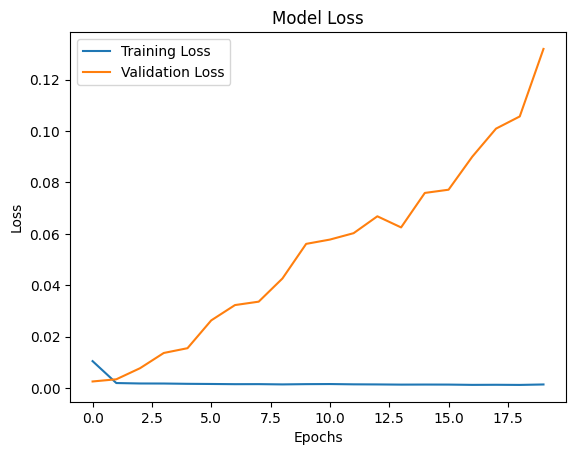

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Model Evaluation

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


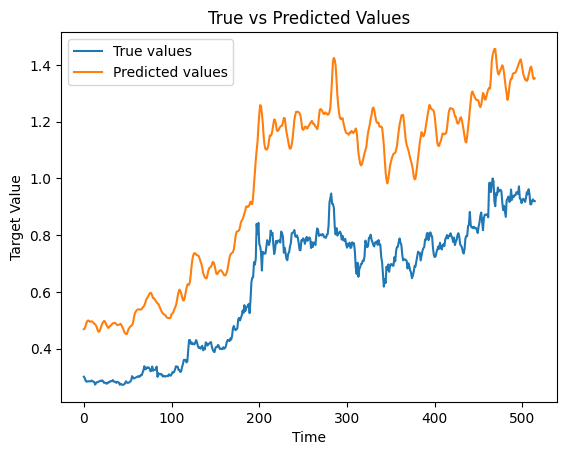

Root Mean Squared Error: 0.363243741415798


In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Compare predictions with the actual values
import matplotlib.pyplot as plt

plt.plot(y_test, label='True values')
plt.plot(predictions, label='Predicted values')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Target Value')
plt.show()

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')


## Visualizing the Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


<ipython-input-46-454fb9d054f2>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[0, -1, 0] = pred  # update the last feature with the prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


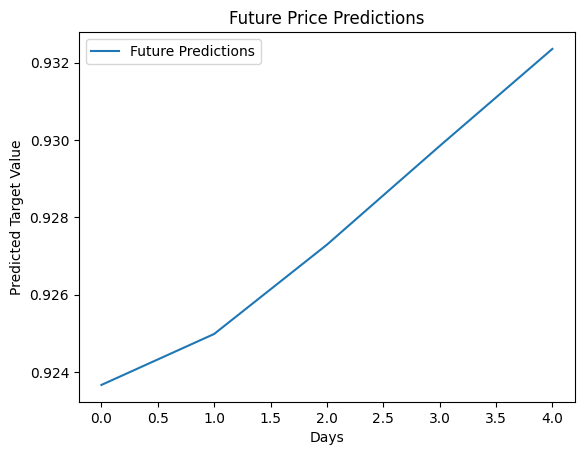

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `model`, `X_train` and any other necessary imports and data preprocessing steps are already done

# Use the last sequence from the training set to predict future values
last_sequence = X_train[-1].reshape(1, X_train.shape[1], X_train.shape[2])

# Predict the next values
future_predictions = []
for _ in range(5):  # predict for the next 10 days
    pred = model.predict(last_sequence)
    future_predictions.append(pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=1)  # shift the sequence
    last_sequence[0, -1, 0] = pred  # update the last feature with the prediction

# Plot future predictions
plt.plot(future_predictions, label='Future Predictions')
plt.legend()
plt.title('Future Price Predictions')
plt.xlabel('Days')
plt.ylabel('Predicted Target Value')
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming `bnb_data_original` is your original dataset before scaling
# Extract the target column
original_y_values = bnb_data['Target'].values

# Create a new scaler instance and fit it with your original target values
scaler = MinMaxScaler()
scaler.fit(original_y_values.reshape(-1, 1))

# Now, inverse transform the predictions
scaled_predictions = np.array(future_predictions).reshape(-1, 1)
original_predictions = scaler.inverse_transform(scaled_predictions)

# Print or plot the original predictions to see real-world values
print(original_predictions)


[[693.19135]
 [694.17706]
 [695.9033 ]
 [697.8117 ]
 [699.6896 ]]


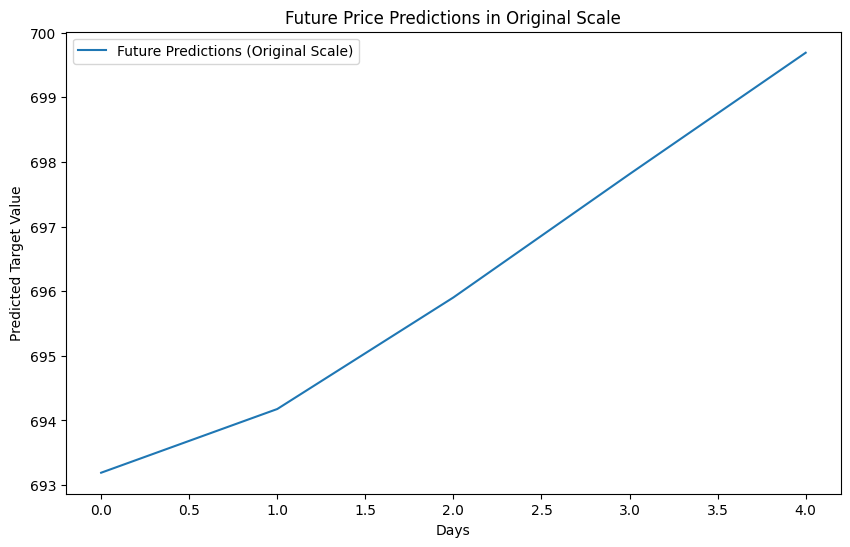

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming `bnb_data_original` is your original dataset before scaling
# Extract the target column
original_y_values = bnb_data['Target'].values

# Create a new scaler instance and fit it with your original target values
scaler = MinMaxScaler()
scaler.fit(original_y_values.reshape(-1, 1))

# Now, inverse transform the predictions
scaled_predictions = np.array(future_predictions).reshape(-1, 1)
original_predictions = scaler.inverse_transform(scaled_predictions)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(original_predictions, label='Future Predictions (Original Scale)')
plt.title('Future Price Predictions in Original Scale')
plt.xlabel('Days')
plt.ylabel('Predicted Target Value')
plt.legend()
plt.show()


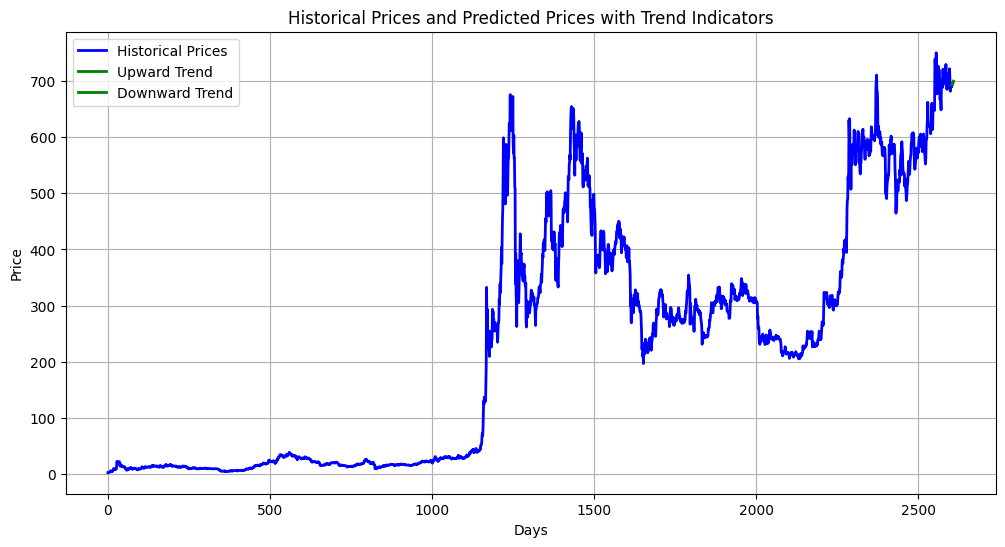

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming bnb_data contains the historical data, and future_predictions are the predicted prices

# Extract the target column (historical prices) from the original dataset
historical_prices = bnb_data['Target'].values

# Create a new scaler instance and fit it with the original target values (historical data)
scaler = MinMaxScaler()
scaler.fit(historical_prices.reshape(-1, 1))

# Inverse transform the predicted scaled values
scaled_predictions = np.array(future_predictions).reshape(-1, 1)
original_predictions = scaler.inverse_transform(scaled_predictions)

# Historical time range
historical_time = np.arange(0, len(historical_prices))  # 0 to N days for historical data

# Predicted time range
prediction_time = np.arange(len(historical_prices), len(historical_prices) + len(original_predictions))

# Plotting both historical and predicted prices
plt.figure(figsize=(12, 6))

# Plot historical prices
plt.plot(historical_time, historical_prices, label='Historical Prices', color='blue', linewidth=2)

# Plot predicted prices with color coding
for i in range(len(original_predictions) - 1):
    if original_predictions[i + 1] > original_predictions[i]:
        plt.plot([prediction_time[i], prediction_time[i + 1]],
                 [original_predictions[i], original_predictions[i + 1]], 'g', linewidth=2)  # Green for upward
    else:
        plt.plot([prediction_time[i], prediction_time[i + 1]],
                 [original_predictions[i], original_predictions[i + 1]], 'r', linewidth=2)  # Red for downward

# Optional: Plot the full predicted prices as dots for additional clarity
# plt.scatter(prediction_time, original_predictions, color='black', label='Predicted Points', zorder=5)

# Enhancing the plot with labels and title
plt.title('Historical Prices and Predicted Prices with Trend Indicators')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend(['Historical Prices', 'Upward Trend', 'Downward Trend'], loc='upper left')

# Display grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.2 MB/s eta 0:00:00


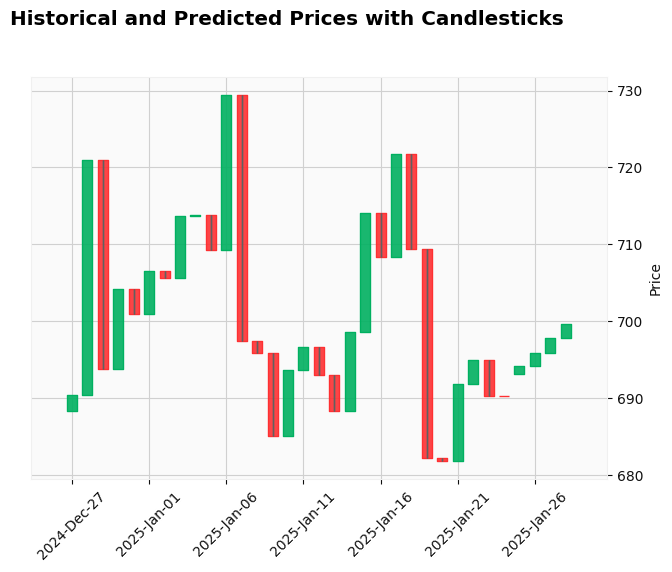

In [ ]:
import numpy as np
import mplfinance as mpf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming bnb_data contains the historical data, and future_predictions are the predicted prices

# Extract the target column (historical prices) from the original dataset
historical_prices = bnb_data['Target'].values

# Define the number of days to display from the historical data
days_to_display = 30

# Ensure that we have at least 'days_to_display' days of data
if len(historical_prices) > days_to_display:
    recent_historical_prices = historical_prices[-days_to_display:]
else:
    recent_historical_prices = historical_prices

# Create a new scaler instance and fit it with the original target values (historical data)
scaler = MinMaxScaler()
scaler.fit(historical_prices.reshape(-1, 1))

# Inverse transform the predicted scaled values
scaled_predictions = np.array(future_predictions).reshape(-1, 1)
original_predictions = scaler.inverse_transform(scaled_predictions)

# Create a DataFrame for the historical prices in OHLC format
ohlc_data_hist = pd.DataFrame({
    'Open': recent_historical_prices[:-1],
    'High': recent_historical_prices[1:],
    'Low': recent_historical_prices[:-1],
    'Close': recent_historical_prices[1:]
}, index=pd.date_range(end=pd.Timestamp.now(), periods=len(recent_historical_prices) - 1, freq='D'))

# Create a similar DataFrame for the predicted prices
ohlc_data_pred = pd.DataFrame({
    'Open': original_predictions[:-1, 0],
    'High': original_predictions[1:, 0],
    'Low': original_predictions[:-1, 0],
    'Close': original_predictions[1:, 0]
}, index=pd.date_range(start=ohlc_data_hist.index[-1] + pd.Timedelta(days=1), periods=len(original_predictions) - 1, freq='D'))

# Concatenate the historical and predicted OHLC data
ohlc_combined = pd.concat([ohlc_data_hist, ohlc_data_pred])

# Plot the combined candlestick chart
mpf.plot(ohlc_combined, type='candle', style='yahoo', title='Historical and Predicted Prices with Candlesticks')
